In [795]:
# Preliminary analysis
## 12 hrs * 25 $/hr = $300

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
df = pd.read_excel('Data.xlsx', sheet_name='data', sep=';')

In [796]:
df

,"Торговельна площа, кв. м.",Тип места,Количество касс,Количество сотрудников в магазине (постоянное),Кластеризация магазинов,"Формат магазину (light, standart)",Формат (старий/новий),Рейтинг в гуглі,Кількість відгуків в гуглі,Количество SKU по категориям Гастрономія,...,Торговий центр до 100 = 50м,Фастфуд до 100 = 50м,Кава на виніс до 100 = 50м,Піцерія до 100 = 50м,Магістральна вулиця до 100 = 50м,Стихійна торгівля до 100 = 50м,Церква до 100 = 50м,Новозбудований ЖК більше 500 квартир до 100,build,reconstr
0,9.00,0,1,1,0,0,0,3.0,NaN,65.0,...,0,0,0,0,0,0,0,0,2994,NaN
1,22.00,0,1,1,0,0,0,4.1,8.0,81.0,...,0,0,0,0,0,0,0,0,3360,NaN
2,13.00,0,1,1,0,1,0,3.0,NaN,55.0,...,1,0,0,1,0,0,0,0,2264,NaN
3,18.00,0,1,1,1,1,0,3.0,NaN,69.0,...,0,0,0,0,0,1,0,0,2264,NaN
4,25.00,1,1,1,0,1,1,4.0,NaN,70.0,...,0,0,0,0,0,0,0,0,4090,893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,0,2,3,2,2,1,4.0,4.0,104.0,...,0,0,0,0,0,0,0,0,228,228.0
65,21.50,0,1,2,2,0,1,2.3,3.0,92.0,...,0,0,0,0,0,0,0,0,2264,155.0
66,115.23,0,1,1,1,0,0,3.0,12.0,92.0,...,0,0,0,0,0,0,0,0,3725,NaN
67,34.80,1,2,2,0,2,1,4.3,17.0,93.0,...,0,0,0,0,0,0,0,0,1431,1431.0


In [741]:
# Date to Duration
import datetime
now = datetime.datetime.now()
build = now - df['Дата открытия']
reconst = now - df['Дата реконструкции']
df['build'] = build.dt.days
df['reconstr'] = reconst.dt.days

In [742]:
df = df.drop(['Адрес','Широта,\n Долгота','Дата открытия','Дата реконструкции','Прибутковість, %','EBITDA, %'], axis='columns', inplace=False)

In [743]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Количество SKU по категориям Напої,63,0.913043
Категорія (A-D),45,0.652174
EBITDA,37,0.536232
Прибуток підрозділу,37,0.536232
Кількість відгуків в гуглі,30,0.434783
...,...,...
Магазин техніки до 100 = 50м,0,0.000000
Парковка до 100 = 50м,0,0.000000
Спальний район до 100 = 50м,0,0.000000
Аптека до 100 = 50м,0,0.000000


In [744]:
df = df.drop(['Количество SKU по категориям Напої', 'Категорія (A-D)'], axis='columns', inplace=False)

In [745]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)
# Encoding categorical data
df = encoding_char(df)

In [746]:
# Dataset Statistics
df.iloc[:,:10].describe()

,Площадь загальна кв.м,"Торговельна площа, кв. м.",Этаж,Тип места,Количество касс,Количество сотрудников в штаті,Количество сотрудников в магазине (постоянное),Кластеризация магазинов,"Формат магазину (light, standart)",Формат (старий/новий)
count,69.000000,69.000000,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,34.872145,1.0,0.449275,1.231884,3.652174,1.869565,1.275362,0.782609,0.710145
std,37.862989,21.704293,0.0,0.529601,0.458416,1.607209,0.838645,0.968383,0.998080,0.488137
min,4.000000,4.000000,1.0,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,26.720000,22.000000,1.0,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.300000,27.500000,1.0,0.000000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000
75%,56.240000,41.000000,1.0,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,1.000000
max,232.300000,119.300000,1.0,2.000000,3.000000,8.000000,4.000000,4.000000,4.000000,2.000000


In [747]:
df = df.drop(['Этаж'], axis='columns', inplace=False)

In [748]:
# Dataset Statistics
df.iloc[:,10:20].describe()

,Кількість відгуків в гуглі,Количество SKU по категориям Гастрономія,Количество SKU по категориям Кулінарія,Количество SKU по категориям Сире мясо,Количество SKU по категориям Супутні твоари,Количество SKU по категориям Хлібобулочні вироби,Количество чеков по часам 8-14,Количество чеков по часам 15-20,Количество чеков в месяц,Средний чек
count,39.000000,65.000000,56.000000,61.000000,64.000000,61.000000,62.000000,62.000000,62.000000,62.000000
mean,42.820513,89.830769,12.767857,23.327869,26.781250,52.032787,4079.741935,3018.112903,7097.209677,95.897581
std,81.975565,17.746099,8.996951,9.860225,21.533635,15.878673,2334.254653,2009.425047,4275.181297,19.192685
min,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,476.000000,369.000000,878.000000,65.270000
25%,5.000000,84.000000,7.000000,15.000000,12.000000,47.000000,2057.250000,1475.250000,3661.000000,82.420000
50%,12.000000,93.000000,10.500000,23.000000,20.500000,52.000000,3876.500000,2467.000000,6430.500000,93.855000
75%,33.000000,99.000000,17.000000,31.000000,33.500000,59.000000,5214.250000,4103.250000,9070.750000,102.787500
max,367.000000,113.000000,43.000000,42.000000,94.000000,94.000000,9687.000000,7852.000000,17537.000000,168.070000


In [749]:
# Dataset Statistics
df.iloc[:,20:30].describe()

,Среднее количество единиц в чеке,Офіси,Людинопотік,Населення,"Середній дохід наелення,грн",Автомобілів в день,"Середній дохід населення,грн в області до 5хв","Середній дохід населення,грн в області до 10хв",Населення середнє в областідо 5хв,Населення середнє в областідо 10хв
count,62.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.896290,439.875000,2755.765625,295.953125,11306.843750,25210.718750,11990.421875,11418.593750,6061.312500,19976.906250
std,0.218364,459.930792,2058.993750,322.552785,2438.706261,47580.292784,2570.309158,2528.015011,4409.636752,13513.681268
min,1.270000,0.000000,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1362.000000
25%,1.770000,117.000000,1148.500000,0.000000,10095.750000,0.000000,10850.000000,10412.500000,1615.250000,8764.000000
50%,1.890000,313.500000,2208.000000,179.500000,11680.500000,6232.500000,12250.000000,11515.000000,6503.000000,19318.000000
75%,2.017500,662.000000,3998.750000,564.000000,13074.750000,18149.750000,13492.500000,12915.000000,9598.500000,30531.250000
max,2.540000,2185.000000,10016.000000,963.000000,14937.000000,181955.000000,16100.000000,15470.000000,14157.000000,54688.000000


In [750]:
# Dataset Statistics
df.iloc[:,30:40].describe()

,Прибуток підрозділу,EBITDA,Успех,Магазин техніки до 50м,Парковка до 50м,Спальний район до 50м,Аптека до 50м,Секон хенд до 50м,Магазин мобільного звязку до 50м,Продуктовий ринок до 50м
count,3.200000e+01,3.200000e+01,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2.176065e+05,3.590348e+05,0.362319,0.144928,0.217391,0.391304,0.420290,0.144928,0.057971,0.173913
std,4.381971e+05,4.802438e+05,0.484192,0.354607,0.415493,0.491618,0.497222,0.354607,0.235401,0.381812
min,-3.008090e+05,-2.492010e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.419650e+04,1.541625e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.980850e+04,2.550185e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.327380e+05,5.679900e+05,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.436784e+06,1.512875e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [751]:
# Dataset Statistics
df.iloc[:,40:50].describe()

,Речовий ринок до 50м,Транзитна зупинка міжміського ГТ до 50м,Зупинка ГТ з дому до 50м,Зупинка ГТ додому до 50м,Кінцева зупинкка ГТ до 50м,Пішохідний перехід до 50м,Спеціалізований хліб до 50м,Спеціалізоване мясо до 50м,Спеціалізований сир до 50м,Спеціалізована поб. хімія до 50м
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.130435,0.101449,0.362319,0.275362,0.086957,0.333333,0.318841,0.289855,0.231884,0.246377
std,0.339248,0.304135,0.484192,0.449969,0.283836,0.474858,0.469441,0.457019,0.425127,0.434057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [752]:
# Dataset Statistics
df.iloc[:,50:60].describe()

,Супермаркет до 50м,Магазин біля дому до 50м,Фастфуд до 50м,Кава на виніс до 50м,Піцерія до 50м,Магістральна вулиця до 50м,Внутрішньоквартальна дорога до 50м,Прогулянкова зона до 50м,Якість покриття перед магазином до 50м,Стихійна торгівля до 50м
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.202899,0.304348,0.202899,0.217391,0.086957,0.449275,0.376812,0.188406,0.115942,0.101449
std,0.405104,0.463502,0.405104,0.415493,0.283836,0.501065,0.488137,0.393901,0.322501,0.304135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [753]:
# Dataset Statistics
df.iloc[:,60:70].describe()

,Зона пікніка до 50м,Церква до 50м,Магазин техніки до 100 = 50м,Парковка до 100 = 50м,Спальний район до 100 = 50м,Аптека до 100 = 50м,"Університет, училище, інститут до 100 = 50м",Школа до 100 = 50м,Продуктовий ринок до 100 = 50м,Речовий ринок до 100 = 50м
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.043478,0.086957,0.057971,0.057971,0.101449,0.188406,0.043478,0.072464,0.115942,0.086957
std,0.205425,0.283836,0.235401,0.235401,0.304135,0.393901,0.205425,0.261154,0.322501,0.283836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [754]:
# Dataset Statistics
df.iloc[:,70:80].describe()

,Транзитна зупинка міжміського ГТ до 100 = 50м,Зупинка ГТ з дому до 100 = 50м,Зупинка ГТ додому до 100 = 50м,Пішохідний перехід до 100 = 50м,Спеціалізований хліб до 100 = 50м,Спеціалізоване мясо до 100 = 50м,Спеціалізований сир до 100 = 50м,Спеціалізована поб. хімія до 100 = 50м,Супермаркет до 100 = 50м,Магазин біля дому до 100 = 50м
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.072464,0.246377,0.260870,0.188406,0.188406,0.188406,0.159420,0.115942,0.275362,0.275362
std,0.261154,0.434057,0.442326,0.393901,0.393901,0.393901,0.368749,0.322501,0.449969,0.449969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [755]:
# Dataset Statistics
df.iloc[:,80:96].describe()

,Лікарня до 100 = 50м,Поліклініка до 100 = 50м,Торговий центр до 100 = 50м,Фастфуд до 100 = 50м,Кава на виніс до 100 = 50м,Піцерія до 100 = 50м,Магістральна вулиця до 100 = 50м,Стихійна торгівля до 100 = 50м,Церква до 100 = 50м,Новозбудований ЖК більше 500 квартир до 100,build,reconstr
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,45.000000
mean,0.043478,0.043478,0.086957,0.144928,0.173913,0.043478,0.144928,0.086957,0.057971,0.043478,2170.347826,621.666667
std,0.205425,0.205425,0.283836,0.354607,0.381812,0.205425,0.354607,0.283836,0.235401,0.205425,1386.893660,396.170475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,79.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,973.000000,377.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2264.000000,489.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3725.000000,929.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4090.000000,1703.000000


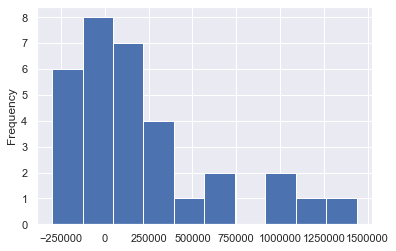

In [756]:
# Feature distribution
df['Прибуток підрозділу'].plot(kind = 'hist')

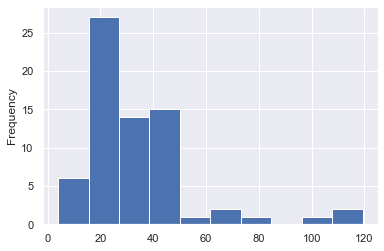

In [757]:
# Feature distribution
df['Торговельна площа, кв. м.'].plot(kind = 'hist')

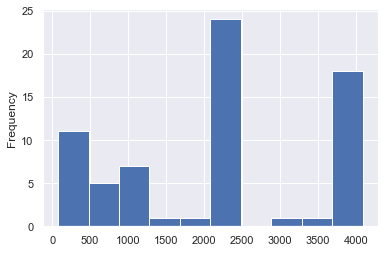

In [758]:
# Feature distribution
df['build'].plot(kind = 'hist')

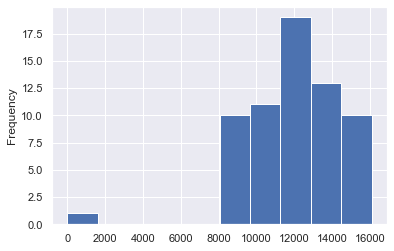

In [759]:
# Feature distribution
df['Середній дохід населення,грн в області до 5хв'].plot(kind = 'hist')

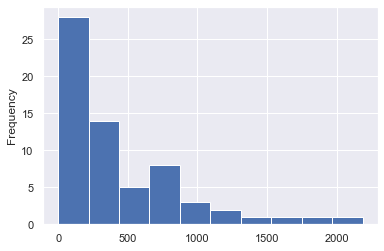

In [760]:
# Feature distribution
df['Офіси'].plot(kind = 'hist')

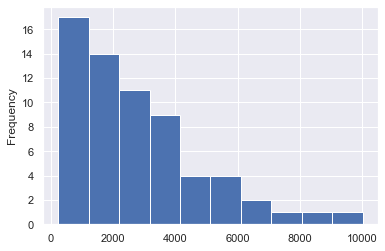

In [761]:
# Feature distribution
df['Людинопотік'].plot(kind = 'hist')

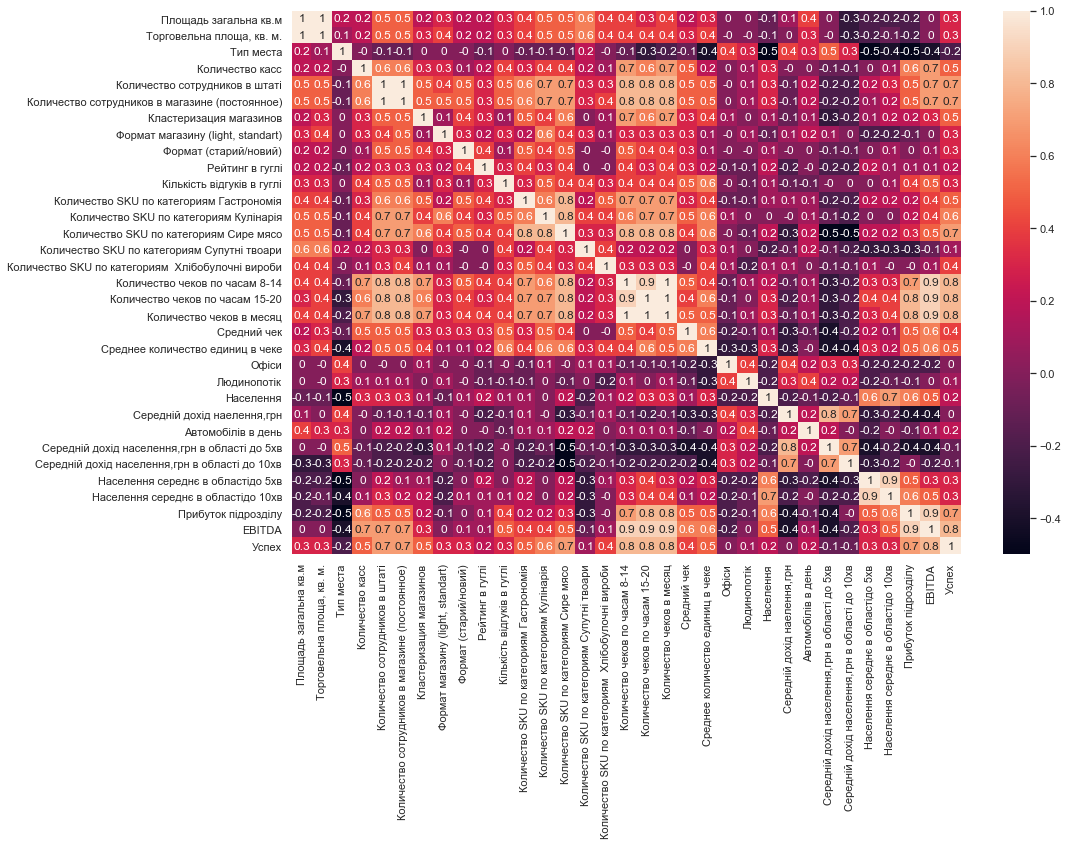

In [762]:
# Cheking main correlations
pr_rev = df.iloc[:,:33]
corrMatrix = round(pr_rev.corr(),1)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [763]:
# Deleting correlated
df = df.drop(['Площадь загальна кв.м','Количество сотрудников в штаті','Количество чеков по часам 8-14','Количество чеков по часам 15-20','Середній дохід населення,грн в області до 10хв','Населення середнє в областідо 10хв','EBITDA'], axis='columns', inplace=False)

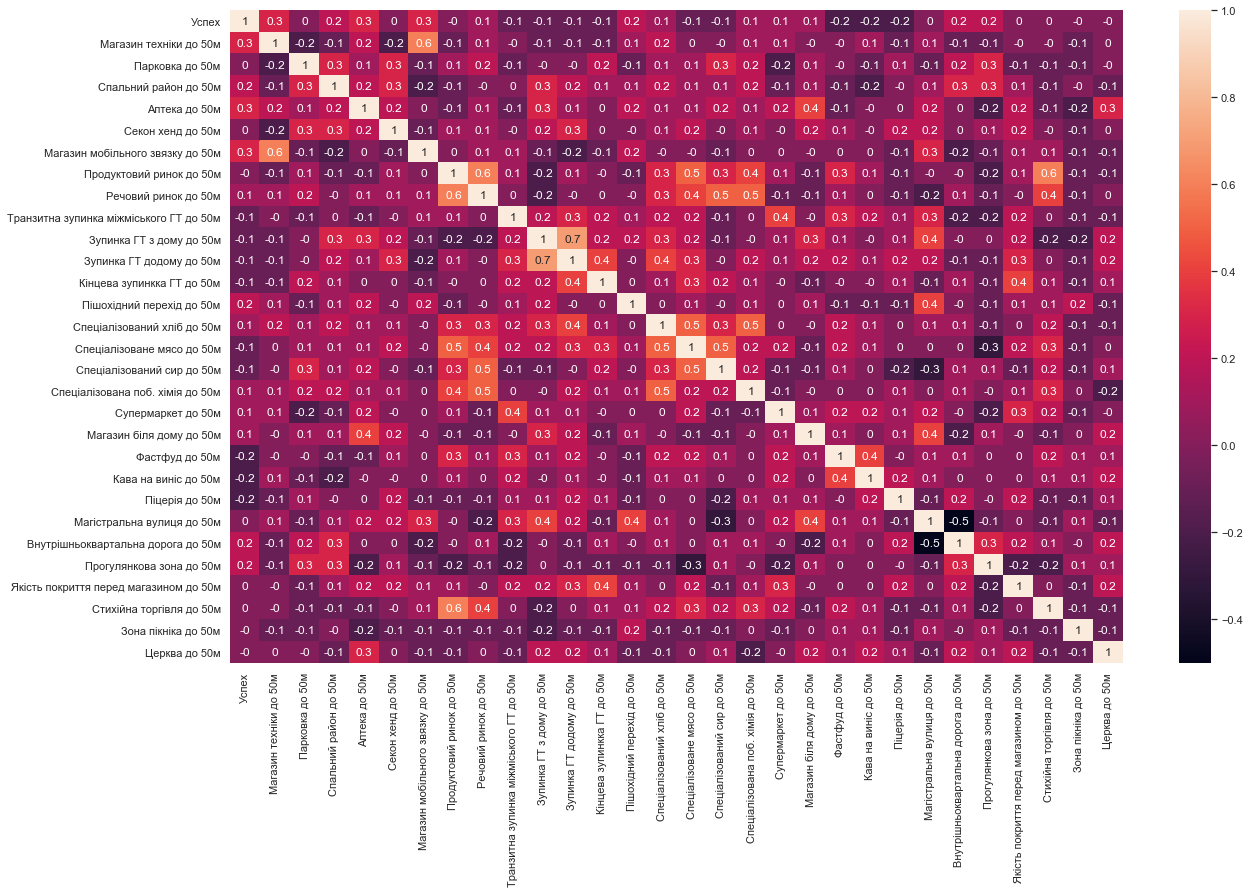

In [764]:
# Cheking geo correlations
pr_rev = df.iloc[:,25:55]
corrMatrix = round(pr_rev.corr(),1)
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [765]:
# REGRESSION

In [766]:
# Multiple Regression

In [767]:
df_r = df.copy()

In [768]:
cols = list(df_r.columns.values)
col_income = cols.pop(cols.index('Прибуток підрозділу')) #Remove from list
df_r = df_r[[col_income]+cols]

In [769]:
# Drop features
df_r = df_r.drop(['Успех','Рейтинг в гуглі','Кількість відгуків в гуглі','Количество SKU по категориям Гастрономія','Количество SKU по категориям Кулінарія','Количество SKU по категориям  Хлібобулочні вироби','Количество SKU по категориям Сире мясо','Количество SKU по категориям Супутні твоари','reconstr','Количество чеков в месяц','Средний чек','Среднее количество единиц в чеке'], axis='columns', inplace=False)

In [770]:
# Drop NA
df_mr = df_r.iloc[:,:43]
df_mr = df_mr.dropna()
df_mr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 5 to 68
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Прибуток підрозділу                             28 non-null     float64
 1   Торговельна площа, кв. м.                       28 non-null     float64
 2   Тип места                                       28 non-null     int64  
 3   Количество касс                                 28 non-null     int64  
 4   Количество сотрудников в магазине (постоянное)  28 non-null     int64  
 5   Кластеризация магазинов                         28 non-null     int64  
 6   Формат магазину (light, standart)               28 non-null     int64  
 7   Формат (старий/новий)                           28 non-null     int64  
 8   Офіси                                           28 non-null     float64
 9   Людинопотік                                  

In [771]:
# Drop features
df_mr = df_mr.drop(['Количество касс','Населення','Людинопотік','Середній дохід наелення,грн','Магазин техніки до 50м','Секон хенд до 50м','Магазин мобільного звязку до 50м','Речовий ринок до 50м','Аптека до 50м','Транзитна зупинка міжміського ГТ до 50м','Зупинка ГТ додому до 50м','Кінцева зупинкка ГТ до 50м','Спеціалізована поб. хімія до 50м','Спеціалізований хліб до 50м','Фастфуд до 50м','Прогулянкова зона до 50м','Якість покриття перед магазином до 50м','Стихійна торгівля до 50м','Зона пікніка до 50м'], axis='columns', inplace=False)
df_mr.shape

(28, 24)

In [772]:
# Splitting the dataset into the Training set and Test set
X = df_mr.iloc[:, 1:].values
y = df_mr.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [773]:
# Multiple Linear Regression, checking p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.9461
Date:                Sun, 14 Mar 2021   Prob (F-statistic):              0.635
Time:                        12:45:13   Log-Likelihood:                -328.01
No. Observations:                  25   AIC:                             702.0
Df Residuals:                       2   BIC:                             730.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.087e+06   3.93e+06     -0.277      0.808    -1.8e+07    1.58e+07
x1         -1455.9979   6985.915     -0.208      0.854   -3.15e+04    2.86e+04
x2         -1.526e+05   6.02e+05     -0.254      0.823   -2.74e+06    2.44e+06
x3          1.048e+05   4.28e+05      0.245      0.829   -1.73e+06    1.94e+06
x4          1.764e+04   4.24e+05      0.042      0.971   -1.81e+06    1.84e+06
x5          -5.59e+04   4.26e+05     -0.131      0.908   -1.89e+06    1.78e+06
x6          1.984e+05   8.83e+05      0.225      0.843    -3.6e+06       4e+06
x7            66.2709    437.892      0.151      0.894   -1817.827    1950.369
x8             0.9265      8.109      0.114      0.919     -33.964      35.817
x9            89.5074    384.971      0.233      0.838   -1566.888    1745.903
x10           16.4262    120.768      0.136      0.904    -503.198     536.051
x11         4.865e+04   1.12e+06      0.044      0.969   -4.76e+06    4.85e+06
x12         3.868e+05   1.49e+06      0.259      0.820   -6.03e+06    6.81e+06
x13         2.618e+05   9.47e+05      0.277      0.808   -3.81e+06    4.34e+06
x14        -1.259e+05   7.81e+05     -0.161      0.887   -3.49e+06    3.23e+06
x15         6.911e+04   5.73e+05      0.121      0.915    -2.4e+06    2.53e+06
x16         4.839e+05   2.06e+06      0.235      0.836   -8.38e+06    9.35e+06
x17        -1.102e+06   2.33e+06     -0.473      0.683   -1.11e+07    8.92e+06
x18        -2.946e+05   4.65e+05     -0.633      0.591    -2.3e+06    1.71e+06
x19         8.448e+04   1.01e+06      0.084      0.941   -4.26e+06    4.43e+06
x20         3.609e+04   1.47e+06      0.025      0.983    -6.3e+06    6.37e+06
x21        -6.858e-11   2.18e-10     -0.315      0.783   -1.01e-09    8.68e-10
x22        -4.113e+05    4.7e+05     -0.876      0.473   -2.43e+06    1.61e+06
x23         3.051e+04   5.55e+05      0.055      0.961   -2.36e+06    2.42e+06
==============================================================================
Omnibus:                        0.481   Durbin-Watson:                   2.604
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.593
Skew:                           0.141   Prob(JB):                        0.744
Kurtosis:                       2.300   Cond. No.                     1.29e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.78e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [774]:
# Regression TREE

In [775]:
df_d = df_mr.copy()

In [776]:
# Splitting for DT
train, test = train_test_split(df_d, test_size=0.2, random_state=0)
X_train = train.drop('Прибуток підрозділу', axis=1)
X_test = test.drop('Прибуток підрозділу', axis=1)
y_train = train.iloc[:, 0].values
y_test = test.iloc[:, 0].values

In [777]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeRegressor(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

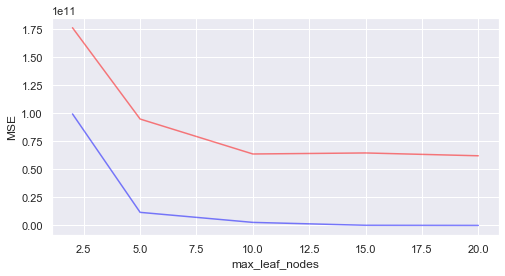

In [778]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [779]:
# Fitting Tree to the Training set
dt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train, y_train)

In [780]:
# Predicting the Test set results
y_pred = dt.predict(X_test)

In [781]:
# Coefficient of determination R^2
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9848080515988927, 0.046651476107051455)

Text(0.5, 1.0, 'Decision Tree. Feature Importance')

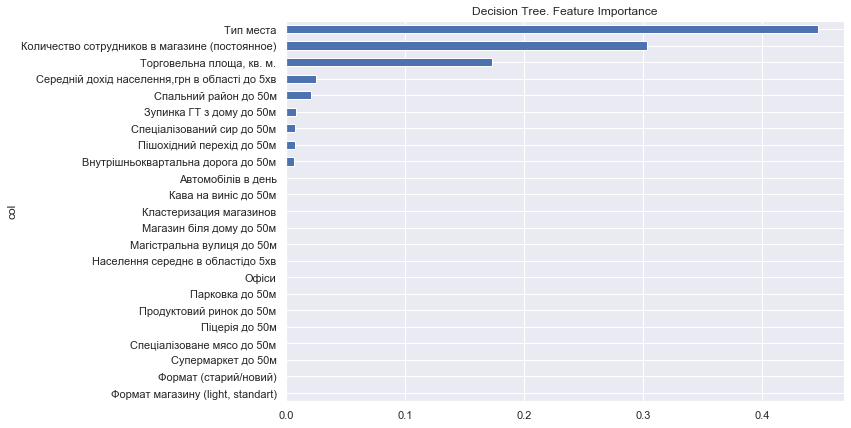

In [782]:
dt_imp = pd.DataFrame({'imp': dt.feature_importances_, 'col': X_train.columns})
dt_imp = dt_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
dt_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Decision Tree. Feature Importance')

In [ ]:
# Average Check 

In [801]:
# Multiple Regression

df_rc = df.copy()

cols = list(df_rc.columns.values)
col_income = cols.pop(cols.index('Средний чек')) #Remove from list
df_rc = df_rc[[col_income]+cols]

# Drop features
df_rc = df_rc.drop(['Успех','Рейтинг в гуглі','Кількість відгуків в гуглі','Количество SKU по категориям Гастрономія','Количество SKU по категориям Кулінарія','Количество SKU по категориям  Хлібобулочні вироби','Количество SKU по категориям Сире мясо','Количество SKU по категориям Супутні твоари','reconstr','Количество чеков в месяц','Прибуток підрозділу','Среднее количество единиц в чеке'], axis='columns', inplace=False)

# Drop NA
df_mr1 = df_rc.iloc[:,:43]
df_mr1 = df_mr1.dropna()

# Drop features
df_mr1 = df_mr1.drop(['Количество касс','Населення','Людинопотік','Середній дохід наелення,грн','Магазин техніки до 50м','Секон хенд до 50м','Магазин мобільного звязку до 50м','Речовий ринок до 50м','Аптека до 50м','Транзитна зупинка міжміського ГТ до 50м','Зупинка ГТ додому до 50м','Кінцева зупинкка ГТ до 50м','Спеціалізована поб. хімія до 50м','Спеціалізований хліб до 50м','Фастфуд до 50м','Прогулянкова зона до 50м','Якість покриття перед магазином до 50м','Стихійна торгівля до 50м','Зона пікніка до 50м'], axis='columns', inplace=False)

# Splitting the dataset into the Training set and Test set
X = df_mr1.iloc[:, 1:].values
y = df_mr1.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [802]:
# Multiple Linear Regression, checking p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()

#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     1.723
Date:                Sun, 14 Mar 2021   Prob (F-statistic):             0.0807
Time:                        14:33:25   Log-Likelihood:                -215.26
No. Observations:                  54   AIC:                             478.5
Df Residuals:                      30   BIC:                             526.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.4884     20.502      4.804      0.000      56.617     140.360
x1             0.1028      0.163      0.629      0.534      -0.231       0.436
x2             2.2451      9.392      0.239      0.813     -16.936      21.426
x3             8.8953      4.780      1.861      0.073      -0.867      18.658
x4            -0.7273      4.510     -0.161      0.873      -9.939       8.484
x5             2.5107      3.592      0.699      0.490      -4.826       9.847
x6             4.7768      7.452      0.641      0.526     -10.442      19.996
x7            -0.0056      0.007     -0.839      0.408      -0.019       0.008
x8         -7.432e-05   7.54e-05     -0.985      0.332      -0.000    7.97e-05
x9            -0.0021      0.002     -1.387      0.176      -0.005       0.001
x10            0.0014      0.001      1.125      0.270      -0.001       0.004
x11           14.7059      8.380      1.755      0.089      -2.409      31.820
x12          -12.0779      9.383     -1.287      0.208     -31.241       7.085
x13           -8.8806      8.286     -1.072      0.292     -25.803       8.042
x14            4.1505      6.707      0.619      0.541      -9.547      17.848
x15           -4.8934      6.535     -0.749      0.460     -18.240       8.453
x16            7.1690      8.832      0.812      0.423     -10.868      25.206
x17           -2.6041      9.113     -0.286      0.777     -21.216      16.008
x18           -0.0848      6.976     -0.012      0.990     -14.331      14.162
x19           -2.9876      7.631     -0.391      0.698     -18.573      12.598
x20            0.2100      6.985      0.030      0.976     -14.056      14.476
x21            5.0173     10.056      0.499      0.621     -15.520      25.554
x22           -1.4666      8.129     -0.180      0.858     -18.068      15.135
x23          -10.6495      7.556     -1.409      0.169     -26.080       4.781
==============================================================================
Omnibus:                       15.157   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.613
Skew:                           1.065   Prob(JB):                     9.09e-05
Kurtosis:                       4.932   Cond. No.                     4.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0.9848080515988927, 0.380282773585905)

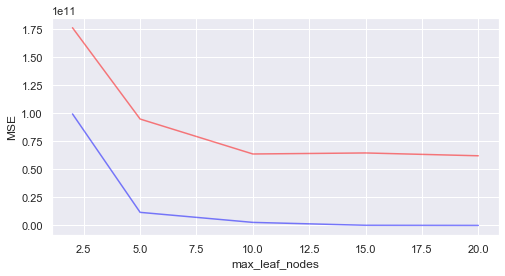

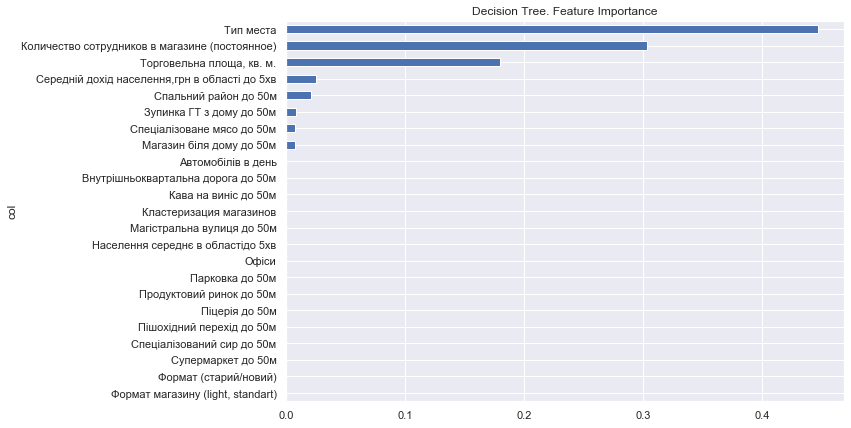

In [800]:
## Regression TREE

df_d1 = df_mr1.copy()

# Splitting for DT
train, test = train_test_split(df_d, test_size=0.2, random_state=0)
X_train = train.drop('Прибуток підрозділу', axis=1)
X_test = test.drop('Прибуток підрозділу', axis=1)
y_train = train.iloc[:, 0].values
y_test = test.iloc[:, 0].values

def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeRegressor(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

# Fitting Tree to the Training set
dt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt.predict(X_test)

#Features importance
dt_imp = pd.DataFrame({'imp': dt.feature_importances_, 'col': X_train.columns})
dt_imp = dt_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
dt_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Decision Tree. Feature Importance')

# Coefficient of determination R^2
dt.score(X_train, y_train), dt.score(X_test, y_test)

In [783]:
# CLASSIFICATION

In [784]:
# Deleting correlated for Classification
df_c = df.copy()
df_c = df_c.drop(['Прибуток підрозділу','Рейтинг в гуглі','Кількість відгуків в гуглі','Количество SKU по категориям Гастрономія','Количество SKU по категориям Кулінарія','Количество SKU по категориям  Хлібобулочні вироби','Количество SKU по категориям Сире мясо','Количество SKU по категориям Супутні твоари','reconstr','Количество чеков в месяц','Средний чек','Среднее количество единиц в чеке'], axis='columns', inplace=False)

In [785]:
cols = list(df_c.columns.values)
col_income = cols.pop(cols.index('Успех')) #Remove from list
df_c = df_c[[col_income]+cols]

In [786]:
df_c = df_c.dropna()
df_c = df_c.iloc[:,:43]

In [787]:
# Splitting for DT
train, test = train_test_split(df_c, test_size=0.2, random_state=0)
X_train = train.drop('Успех', axis=1)
X_test = test.drop('Успех', axis=1)
y_train = train.iloc[:, 0].values
y_test = test.iloc[:, 0].values

In [788]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

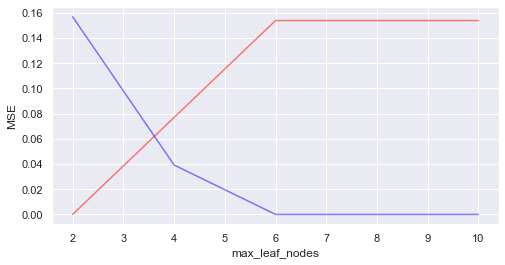

In [789]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2,4,6,8,10])

In [790]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [791]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_train, y_train), ct.score(X_test, y_test)

(0.9607843137254902, 0.9230769230769231)

In [792]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8 0]
 [1 4]]


Text(0.5, 1.0, 'Decision Tree. Feature Importance')

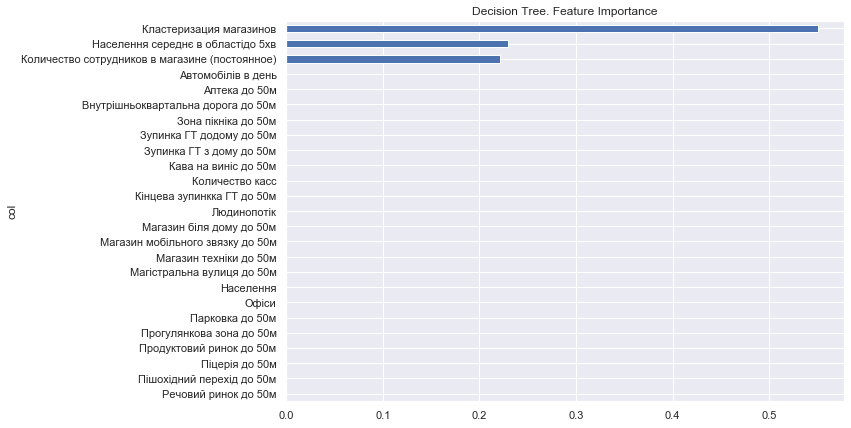

In [793]:
dt_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': X_train.columns})
dt_imp = dt_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
dt_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Decision Tree. Feature Importance')

In [ ]:
# CLUSTERING

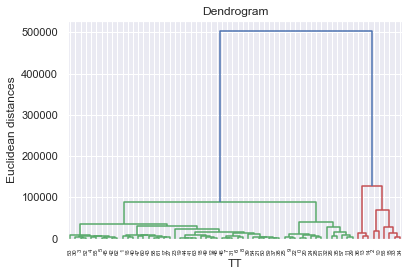

In [728]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_c, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('TT')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# THE END